In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 4000)

In [3]:
data = pd.read_csv("data/part-header.csv", sep=",")
data.head(5)

,year,month,carrier,depAirport,totalFlights,totalDelayedFlights,totalDelay
0,2008,8,DL,FAI,17,8,112
1,2005,10,OO,LWS,61,12,91
2,2008,5,AA,LAX,2506,1238,41475
3,2003,1,MQ,LRD,130,36,1154
4,1992,1,CO,HRL,93,28,381


In [4]:
data = data.replace(['CO', 'AA', 'WN', 'UA', 'US', 'DL', 'YV', 'TW', 'AS', 'NW', 'MQ', 'B6', 'OH', 'HA', 'EV', 
            'AQ', '9E', 'DH', 'OO', 'HP', 'XE', 'FL', 'F9', 'TZ', 'PA (1)', 'EA', 'PI', 'PS', 'ML (1)'], 
           ['Continental Airlines Inc. (CO)', 'American Airlines Inc. (AA)', 'Southwest Airlines Co. (WN)', 
            'United Airlines Inc. (UA)', 'US Airways Inc. (US)', 'Delta Airlines Inc. (DL)', 
            'Mesa Airlines Inc. (YV)', 'Trans World Airways LLC (TW)', 'Alaska Airlines Inc. (AS)', 
            'Northwest Airlines Inc. (NW)', 'American Eagle Airlines (MQ)', 'JetBlue Airways (B6)', 
            'Comair Inc. (OH)', 'Hawaiian Airlines Inc. (HA)', 'Atlantic Southeast Airlines (EV)', 
            'Aloha Airlines Inc. (AQ)', 'Pinnacle Airlines Inc. (9E)', 'Independence Air (DH)', 
            'SkyWest Airlines Inc. (OO)', 'America West Airlines Inc. (HP)', 'ExpressJet Airlines Inc. (XE)', 
            'AirTran Airways (FL)', 'Frontier Airlines Inc. (F9)', 'ATA Airlines (TZ)', 
            'Pan American World Airways (PA (1))', 'Eastern Air Lines (EA)', 'Piedmont Aviation Inc. (PI)', 
            'Pacific Southwest Airlines (PS)', 'Midway Airlines (ML (1))'])

In [5]:
df = data.sort_values(by=['year','month'], ascending=[True,True])
sz = df.groupby(['carrier', 'year'])['totalDelay'].sum()
sz = sz.reset_index()
sz['year'] = sz['year'].astype('str')
sz.head(5)

,carrier,year,totalDelay
0,ATA Airlines (TZ),2003,584599
1,ATA Airlines (TZ),2004,642487
2,ATA Airlines (TZ),2005,361862
3,ATA Airlines (TZ),2006,298453
4,AirTran Airways (FL),2003,1398438


In [6]:
sz['totalDelayofYear'] = np.where(sz['year']=='1987', 
(sz.loc[sz['year'] == '1987', 'totalDelay'].sum()), sz['totalDelay'])

years = ['1988','1989','1990','1991','1992','1993','1994', '1995', '1996', '1997', '1998', '1999', 
         '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008']
for year in years:
    sz['totalDelayofYear'] = np.where(sz['year']==year, 
       (sz.loc[sz['year'] == year, 'totalDelay'].sum()), sz['totalDelayofYear'])

In [7]:
sz['totDelayperCarrier'] = np.where(sz['year']=='1987', 
(sz['totalDelay']/sz['totalDelayofYear'])*100, sz['totalDelay'])

years = ['1988','1989','1990','1991','1992','1993','1994', '1995', '1996', '1997', '1998', '1999', 
         '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008']
for year in years:
    sz['totDelayperCarrier'] = np.where(sz['year']==year, 
       (sz['totalDelay']/sz['totalDelayofYear'])*100, sz['totDelayperCarrier'])

sz.head(5)

,carrier,year,totalDelay,totalDelayofYear,totDelayperCarrier
0,ATA Airlines (TZ),2003,584599,48484392,1.205747
1,ATA Airlines (TZ),2004,642487,70179405,0.915492
2,ATA Airlines (TZ),2005,361862,75381623,0.480040
3,ATA Airlines (TZ),2006,298453,86269459,0.345954
4,AirTran Airways (FL),2003,1398438,48484392,2.884306


In [8]:
top_year = sz.pivot(index='year', columns='carrier', values='totDelayperCarrier')
top_year.head(5)

carrier,ATA Airlines (TZ),AirTran Airways (FL),Alaska Airlines Inc. (AS),Aloha Airlines Inc. (AQ),America West Airlines Inc. (HP),American Airlines Inc. (AA),American Eagle Airlines (MQ),Atlantic Southeast Airlines (EV),Comair Inc. (OH),Continental Airlines Inc. (CO),Delta Airlines Inc. (DL),Eastern Air Lines (EA),ExpressJet Airlines Inc. (XE),Frontier Airlines Inc. (F9),Hawaiian Airlines Inc. (HA),Independence Air (DH),JetBlue Airways (B6),Mesa Airlines Inc. (YV),Midway Airlines (ML (1)),Northwest Airlines Inc. (NW),Pacific Southwest Airlines (PS),Pan American World Airways (PA (1)),Piedmont Aviation Inc. (PI),Pinnacle Airlines Inc. (9E),SkyWest Airlines Inc. (OO),Southwest Airlines Co. (WN),Trans World Airways LLC (TW),US Airways Inc. (US),United Airlines Inc. (UA)
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1987,NaN,NaN,1.705273,NaN,2.569743,9.388623,NaN,NaN,NaN,14.573505,12.568860,8.733433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.034316,5.128832,0.798918,8.639212,NaN,NaN,4.785713,4.694496,6.734474,12.644604
1988,NaN,NaN,1.467968,NaN,2.110264,11.488495,NaN,NaN,NaN,10.999582,10.607554,9.318295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.440997,0.564384,1.278205,10.809652,NaN,NaN,4.293905,5.618607,10.621382,13.380709
1989,NaN,NaN,1.270456,NaN,2.552098,12.654515,NaN,NaN,NaN,7.348384,12.094482,2.890644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.690081,NaN,1.494226,8.846794,NaN,NaN,5.637239,5.010307,18.397490,15.113284
1990,NaN,NaN,1.418579,NaN,3.553808,12.950044,NaN,NaN,NaN,8.255565,16.440504,5.644040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.531906,NaN,1.175147,NaN,NaN,NaN,7.212677,5.202512,17.605870,13.009348
1991,NaN,NaN,1.394180,NaN,4.774128,11.806418,NaN,NaN,NaN,8.784689,19.808462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.34867,7.159327,NaN,0.902158,NaN,NaN,NaN,8.082025,4.527117,15.260945,16.151879


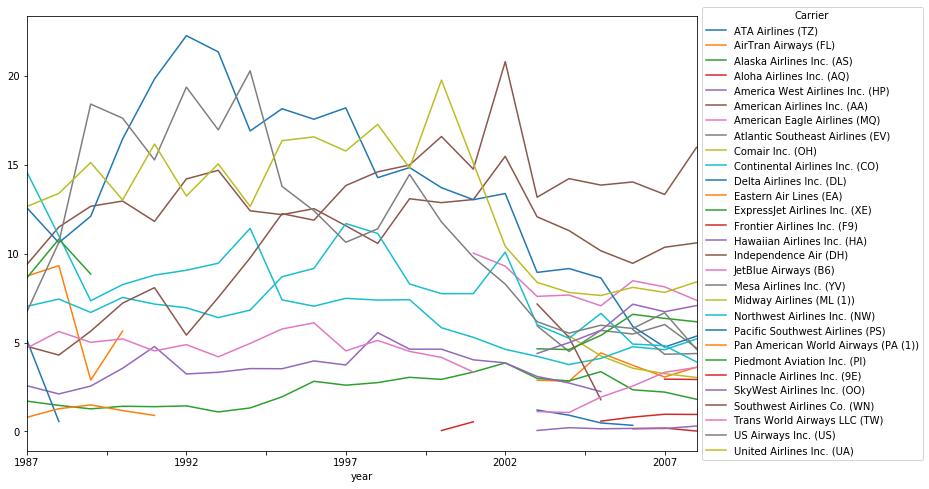

In [9]:
top_year.plot(figsize=(12, 8)).legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Carrier')

/home/marilia/.local/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


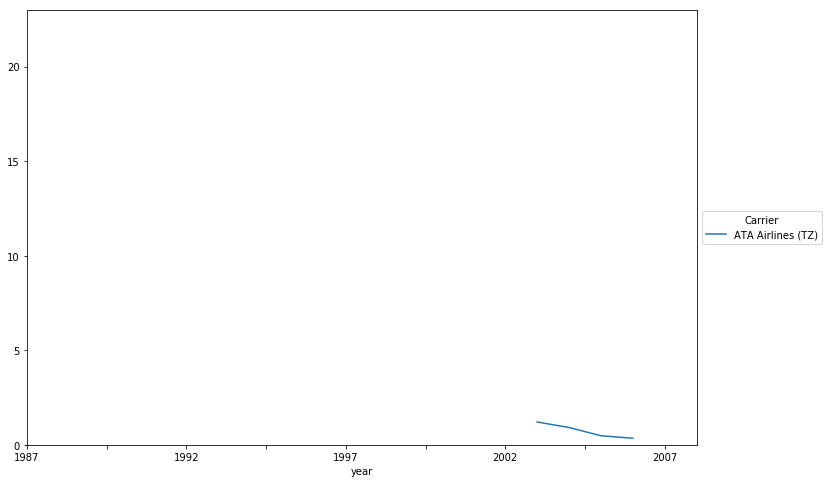

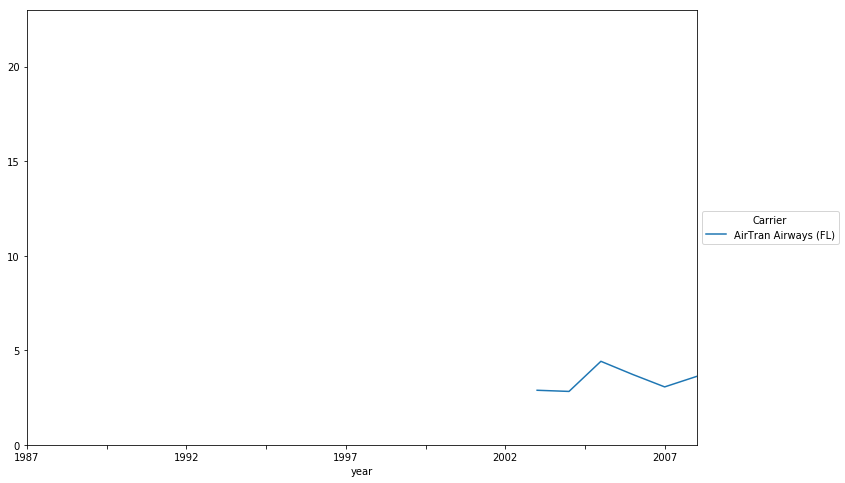

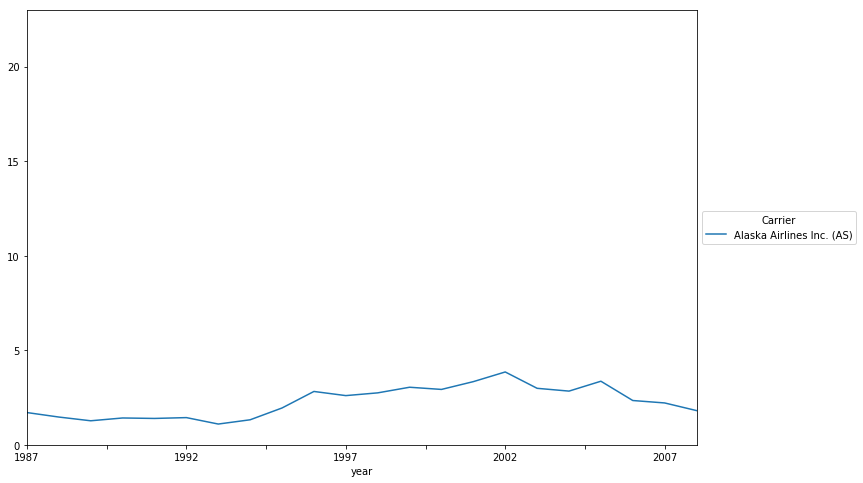

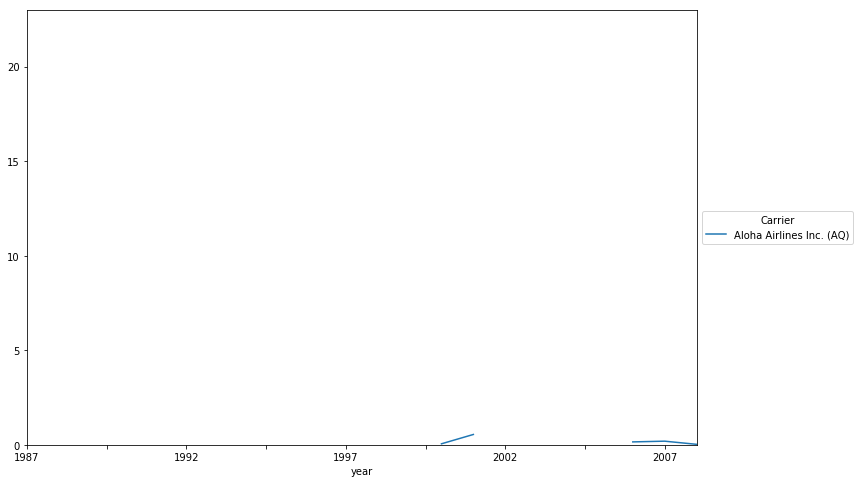

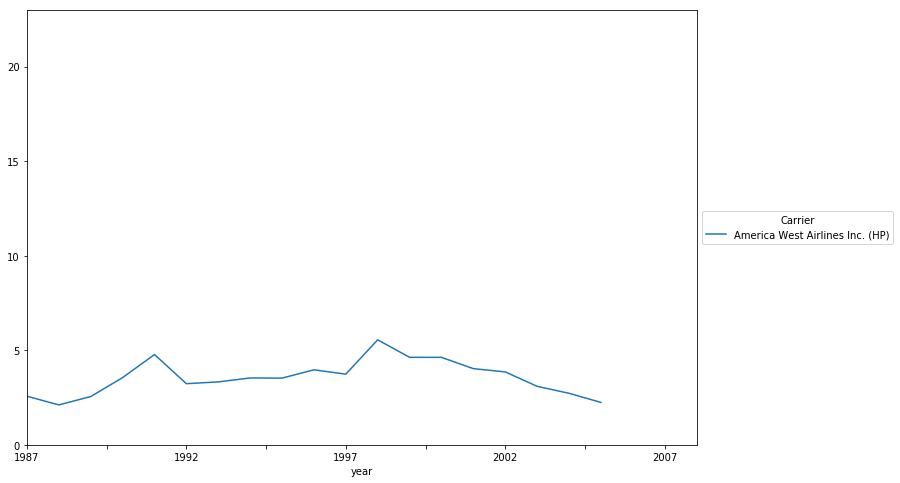

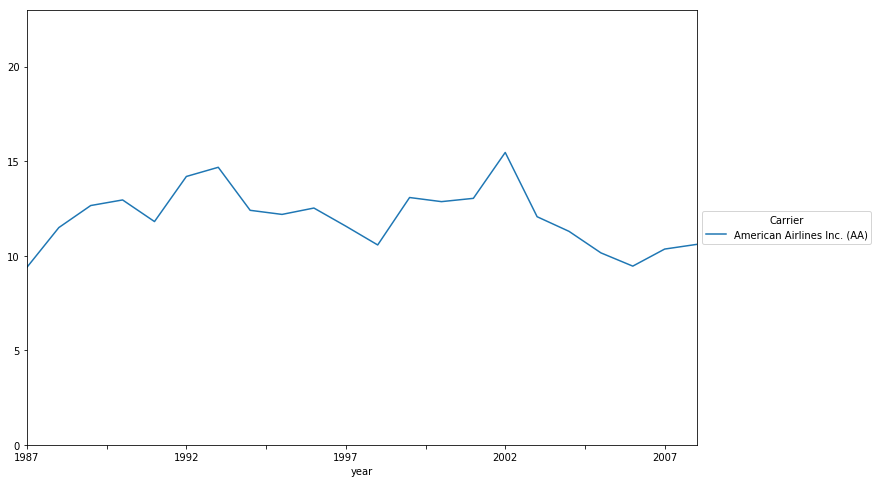

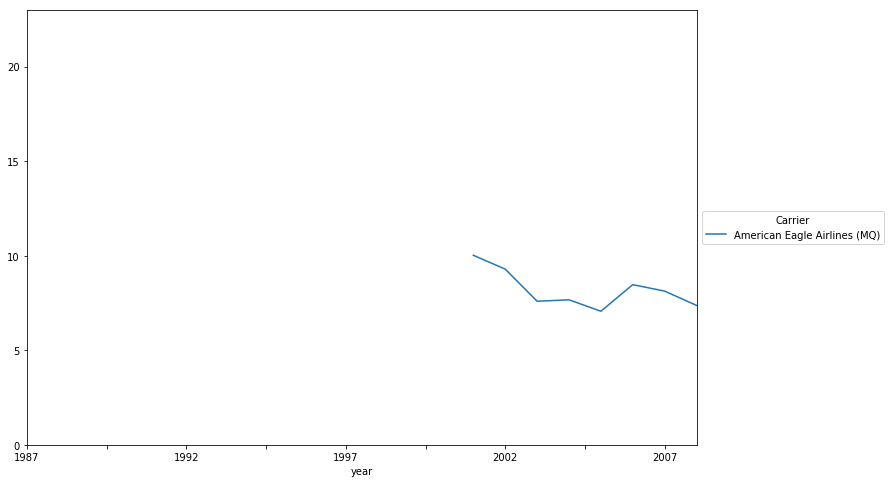

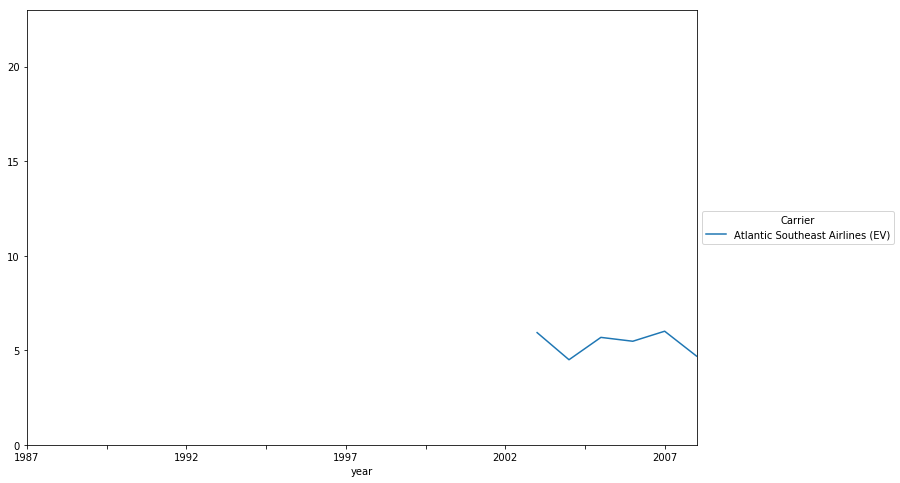

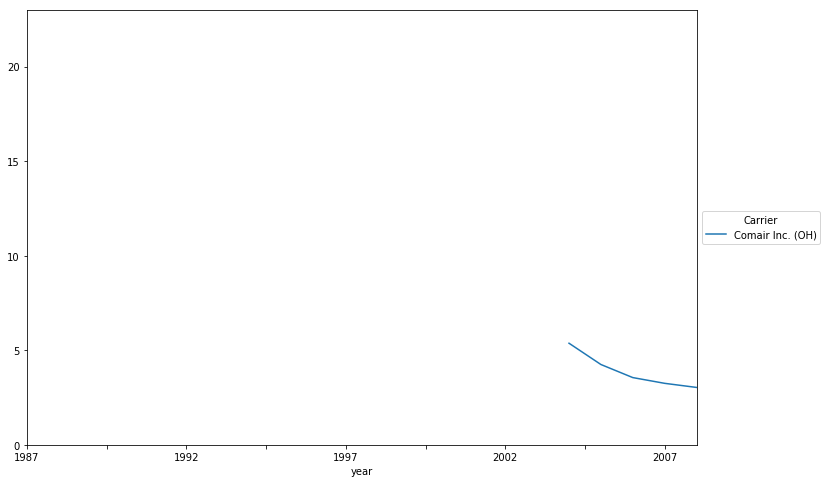

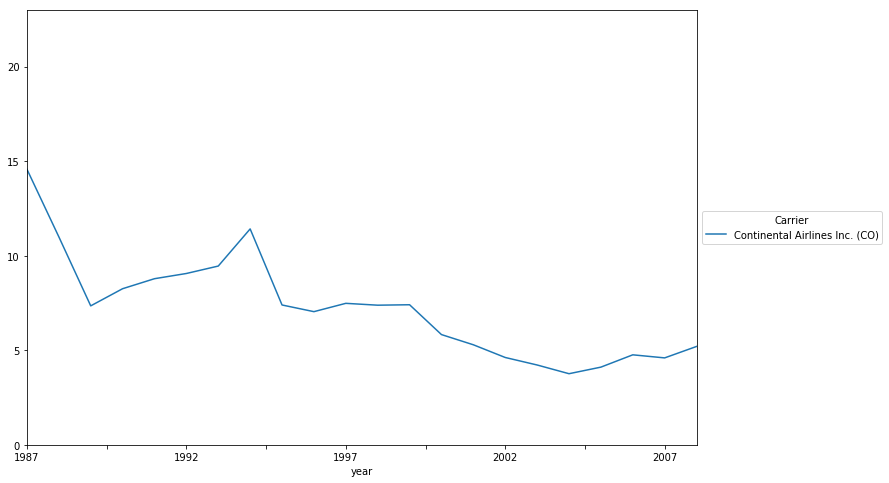

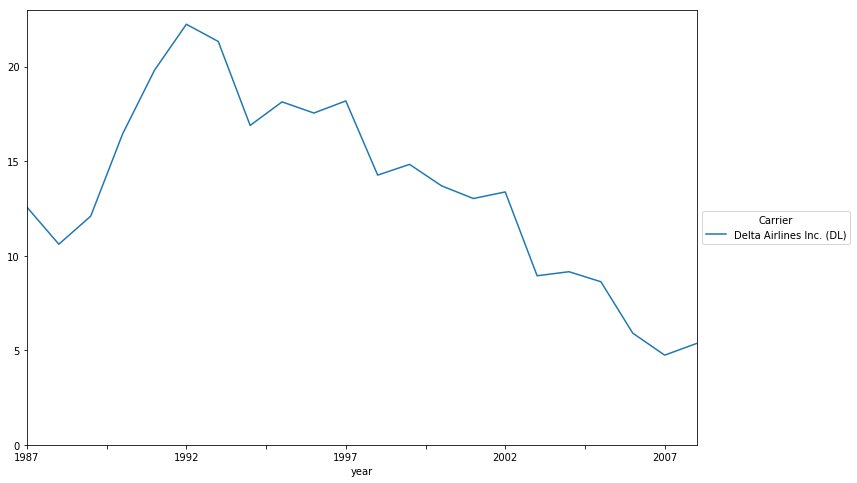

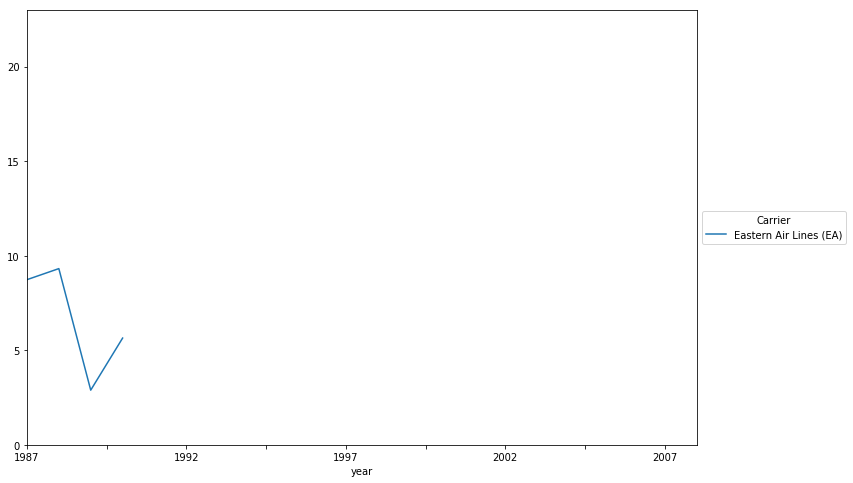

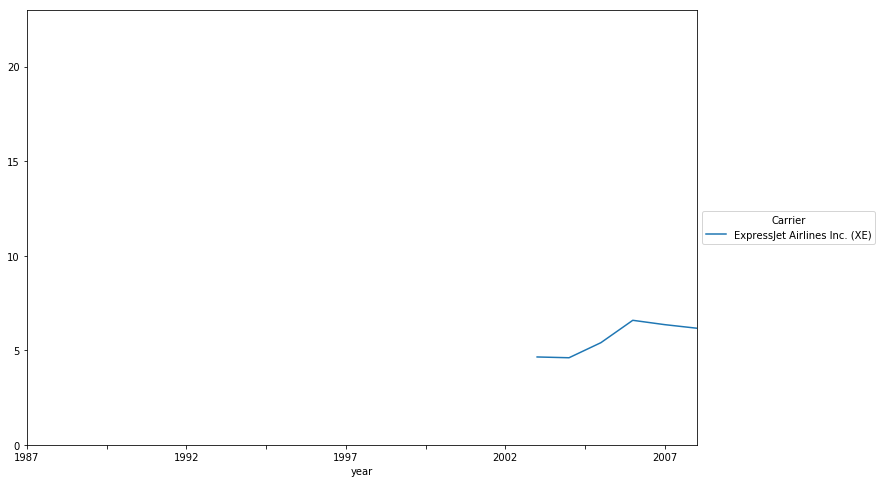

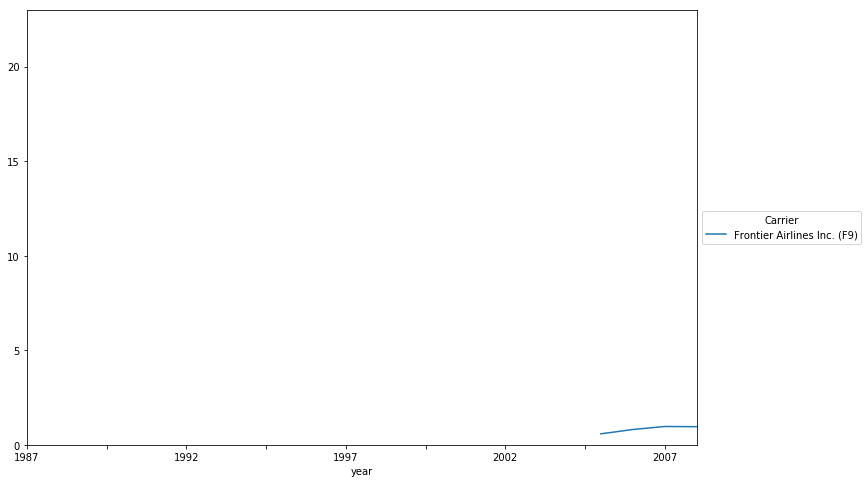

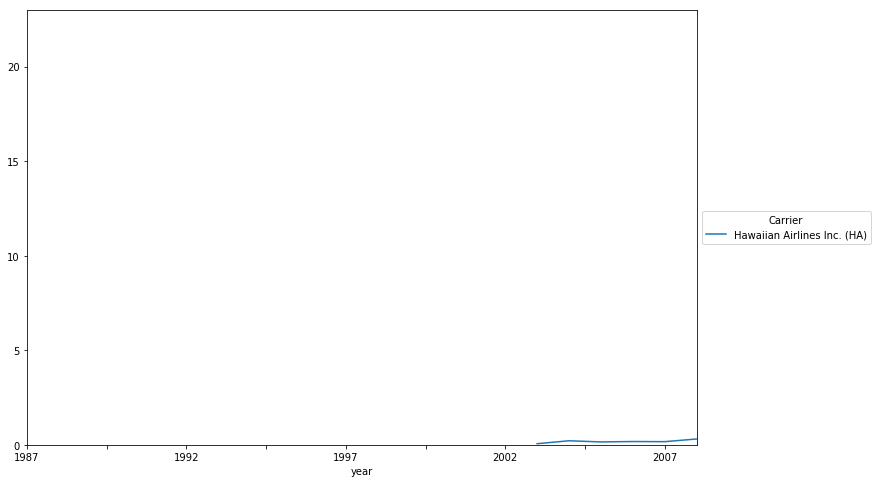

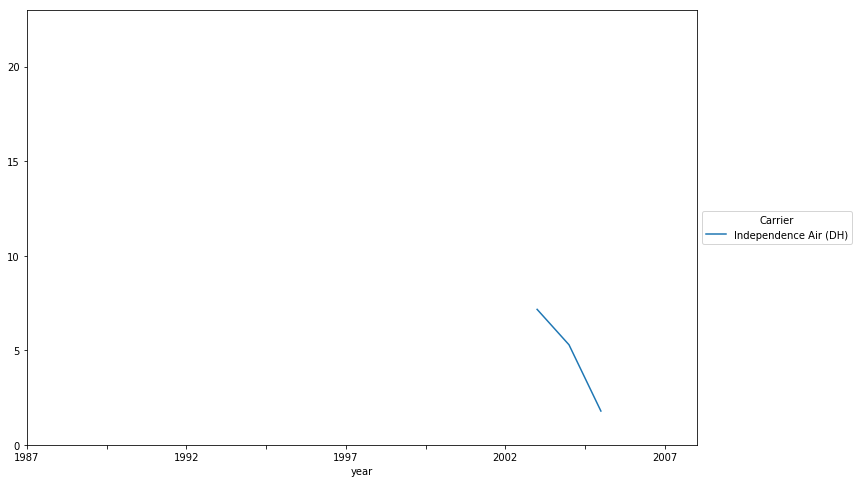

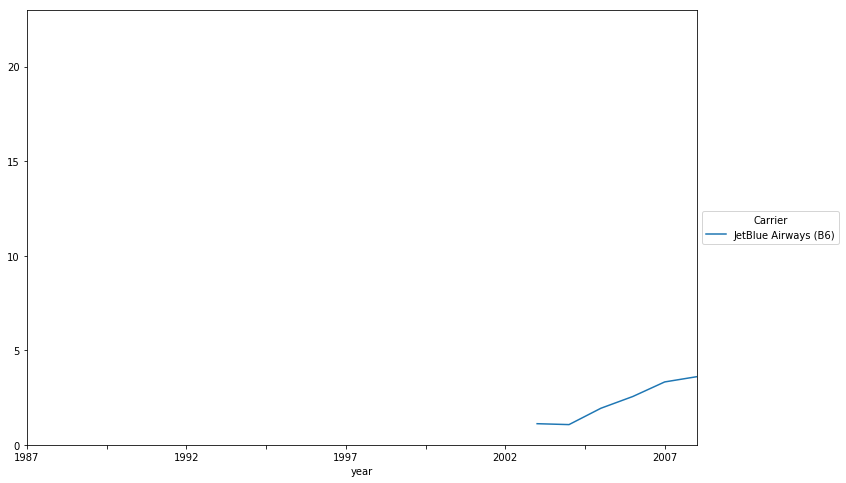

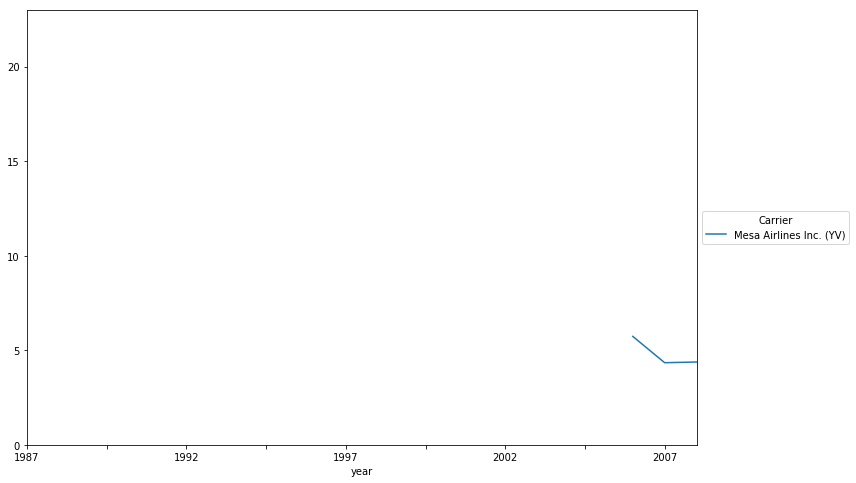

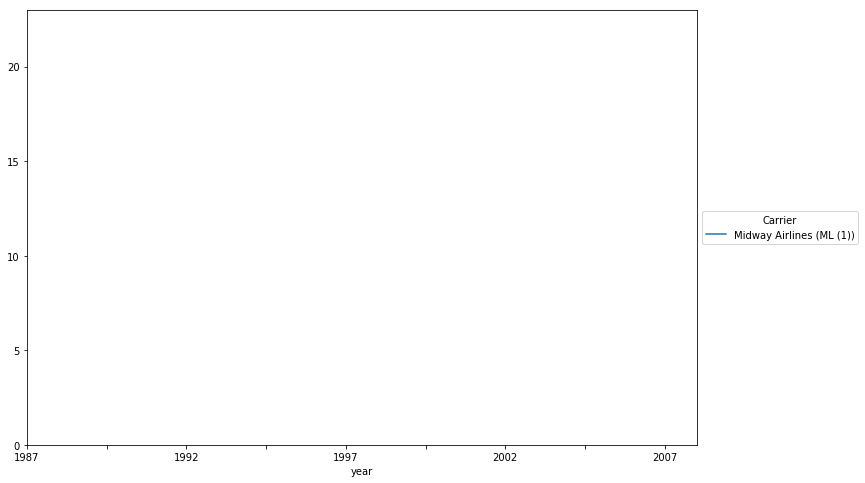

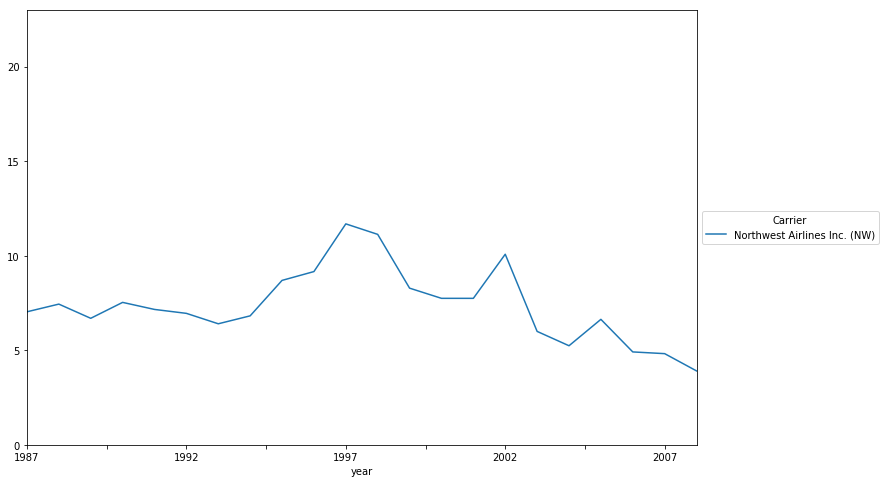

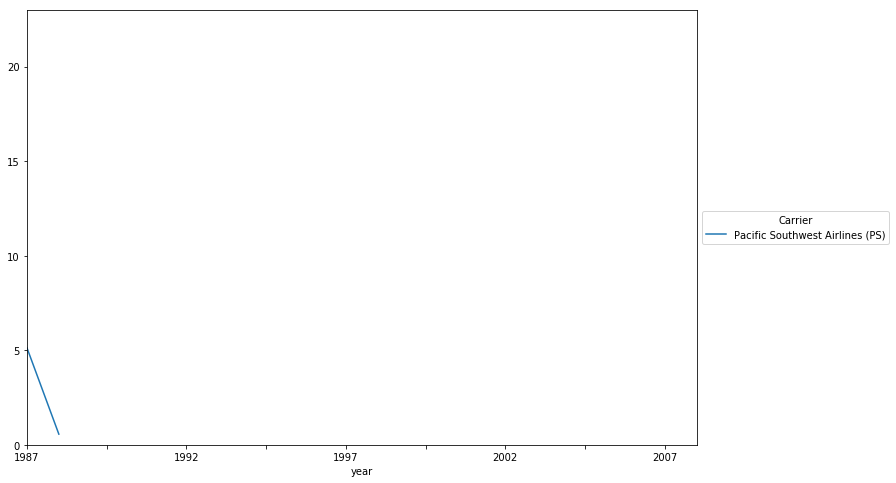

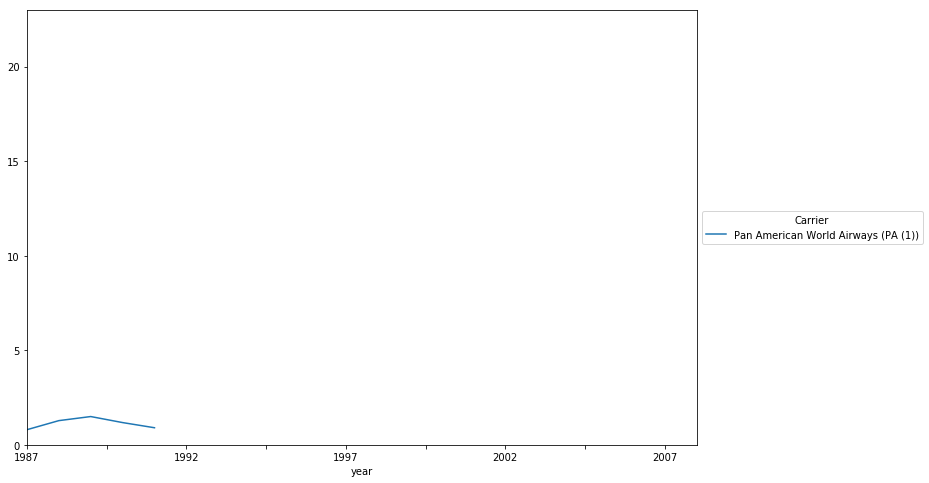

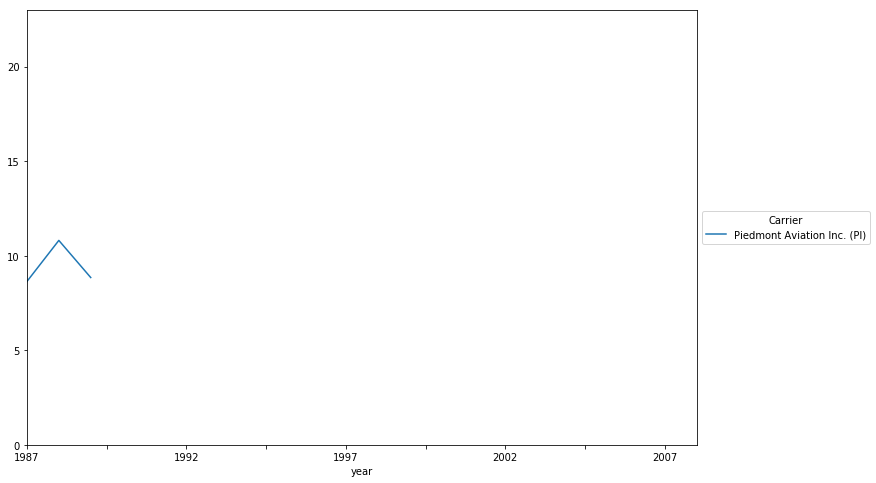

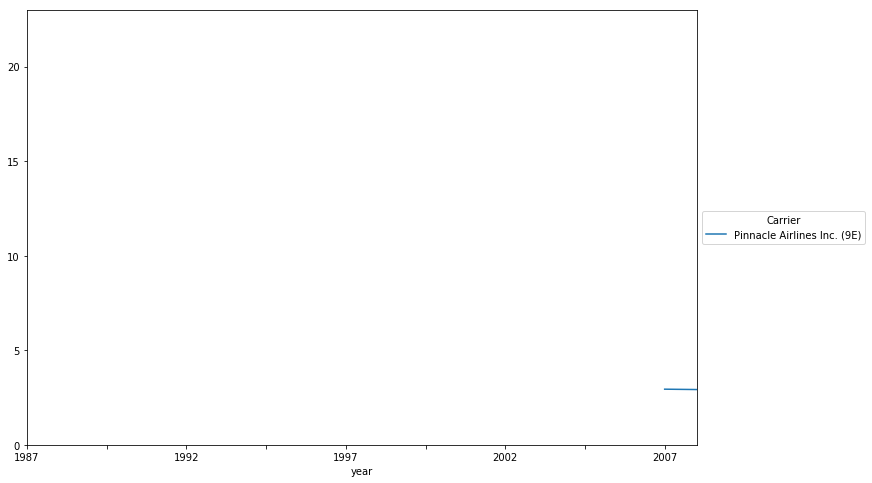

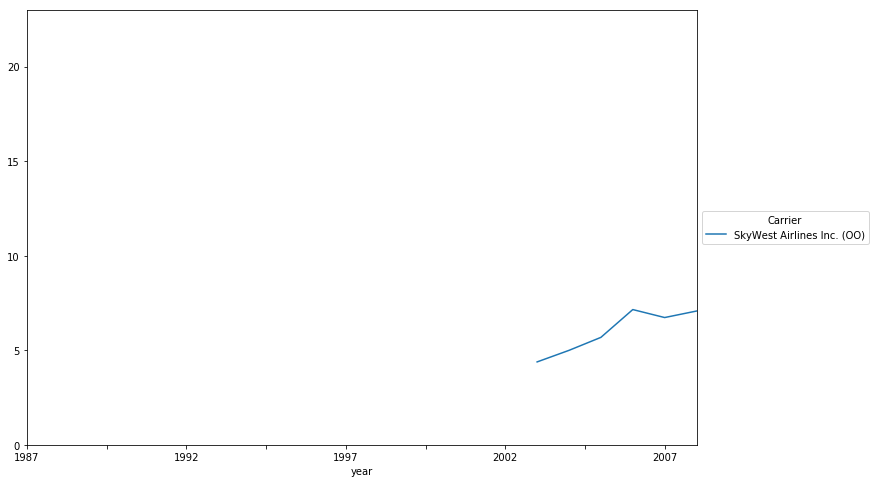

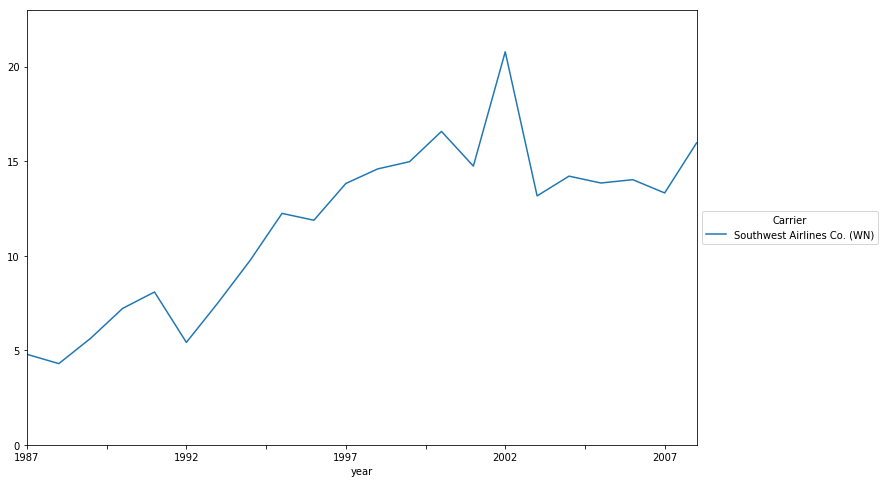

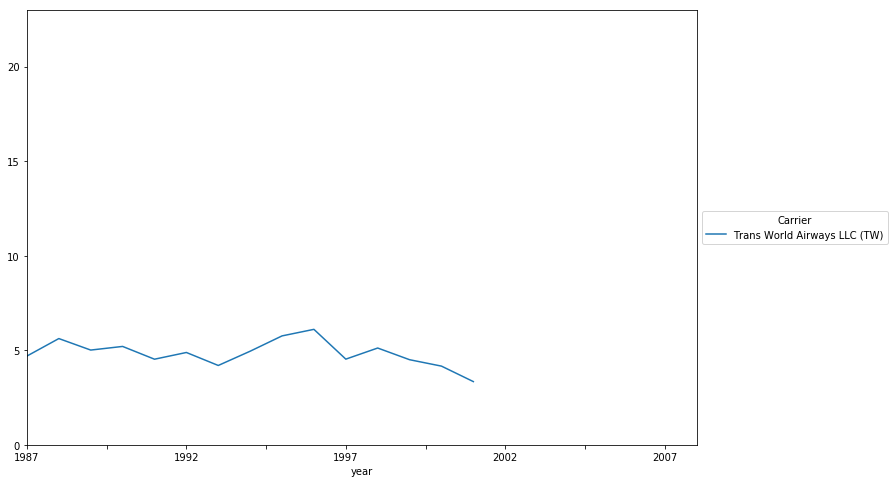

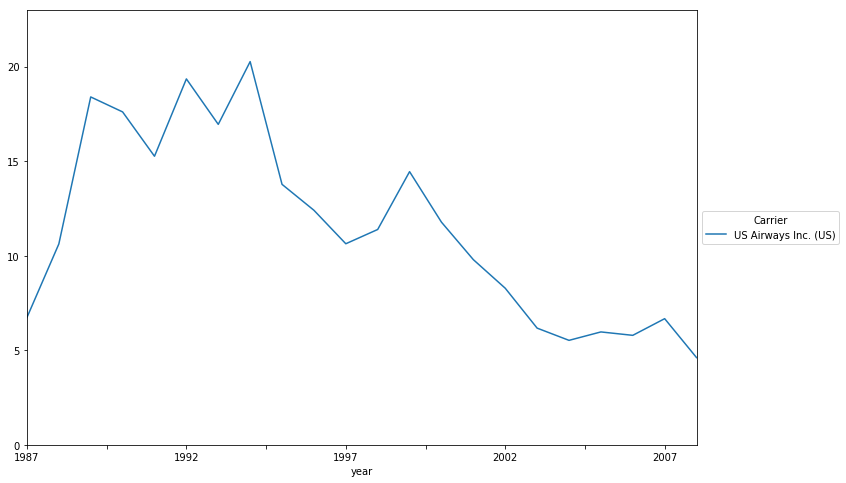

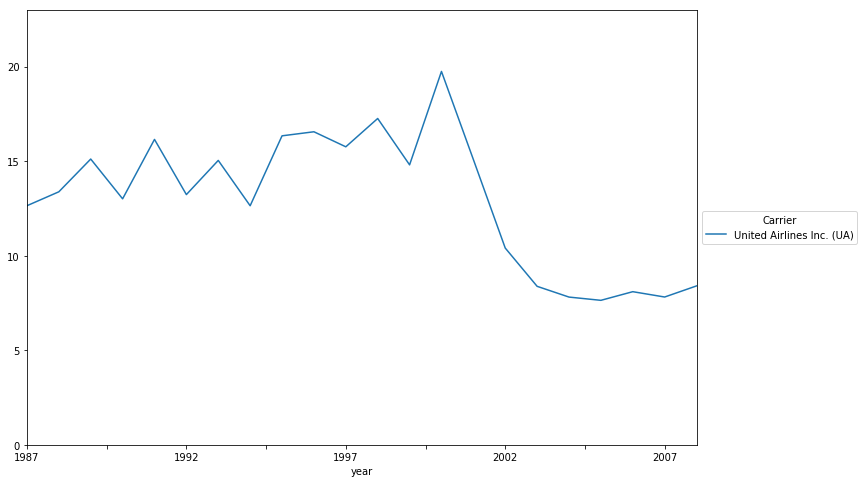

In [10]:
for i in range(0, 29):
    top_year.iloc[:,i:(i+1)].plot(ylim=(0, 23),figsize=(12, 8)).legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Carrier')

In [ ]:
# for i in range(0, 29):
#     top_year.iloc[:,i:(i+1)].plot(ylim=(0, 23),figsize=(12, 8)).legend(title='Carrier')
#     plt.savefig('delay_figs/carrier' + str(i) + '.png')